# Alocação de Tarefas com Restrições
**Objetivo do Problema:**
Alocar um conjunto de tarefas a um conjunto de agentes (ou máquinas), respeitando restrições e otimizando um critério.

## Apresentação do Problema - GAP

Originalmente, estamos tratando de um problema classico, GAP – Generalized Assignment Problem, que pode ser descrito como a atribuição de um conjunto de tarefas a um conjunto de agentes (ou máquinas), de modo que:

- Cada tarefa seja atribuída a exatamente um agente.
- Os recursos disponíveis por agente não sejam excedidos.
- E o custo total da atribuição seja minimizado.

<figure>
  <img src="./images/assignment.png" alt="Assignment Problem" width="500"/>
  <figcaption>Figura 1 – Representação do Problema de Alocação de Tarefas</figcaption>
</figure>

Sobre as condições apresentadas o problema de GAP apresenta uma solução em tempo polinomial, que pode ser dada utilizando tecnicas de progração dinâmica por exemplo. Porem a mario dos problemas que encontramos que podem serem reduzidos ao GAP apresentão as mais diversas restrições, como por exemplo permitir que um agente sejá atribuido a no maximo **x** tarefas, o que torna o problema NP-Hard. 
Trataremos nesse notebooks um caso particular de GAP com retrição NP-Hard utilizando a tecnica de Algoritimo Generico.

## GAP com Restrições NP-Hard
Apresentação detalhada do problema e suas restrições.

### Problema da Alocação Otimizada na TaskForce Solutions

Na empresa TaskForce Solutions, uma equipe de 10 funcionários precisa dar conta de 24 tarefas ao longo do dia. Cada colaborador tem suas especialidades e limitações de carga horária, e o gerente de operações quer garantir que as tarefas sejam distribuídas da forma mais eficiente possível, respeitando as restrições operacionais e maximizando a performance da equipe.

#### Cenário
- A empresa possui 10 funcionários:

   - Ana, Bruno, Carla, Diego, Eduardo, Fernanda, Gustavo, Helena, Igor e Júlia.

- Existem 20 tarefas que precisam ser executadas no dia.
- Cada tarefa:

    - Possui uma duração entre 1h e 8h.
    - Deve ser executada por exatamente um funcionário.

- Cada funcionário:

    - Afinidade com determinada tarefa.
    - Deve receber pelo menos 1 tarefa.
    - Pode executar no máximo 3 tarefas.
    - Pode trabalhar no máximo 10 horas no total.

**Afinidade: O quanto cada funcionário é bom em cada tarefa**

Cada funcionário tem um índice de afinidade com cada tarefa, variando de 0 a 10, representando sua competência ou preferência por executá-la. Quanto maior a afinidade, melhor será a performance e a qualidade do resultado.

A ideia é alocar as tarefas aos funcionários de forma a maximizar a soma das afinidades totais.



#### Objetivo do Problema
    Atribuir as 24 tarefas aos 10 funcionários de forma que:

- Todas as tarefas sejam alocadas.
- Cada funcionário execute entre 1 e 3 tarefas.
- O total de horas de trabalho por funcionário seja no máximo 10h.
- E a soma total das afinidades entre funcionários e tarefas seja maximizada.


<figure>
  <img src="./images/TASK 1.png" alt="Assignment Problem" width="500"/>
  <figcaption>Figura 2 – Alocação de tarefas na TaskForce Solutions



# Modelagem Matemática


## Definições

Seja:

- $F = \{ f_1, f_2, \dots, f_{10} \}$: conjunto de funcionários  
- $T = \{ t_1, t_2, \dots, t_{24} \}$: conjunto de tarefas  
- $x_{ij} \in \{0, 1\}$: variável binária que indica se o funcionário $f_i$ foi atribuído à tarefa $t_j$  
- $a_{ij} \in [0, 10]$: afinidade do funcionário $f_i$ com a tarefa $t_j$  
- $d_j \in \{1, 2, \dots, 8\}$: duração da tarefa $t_j$, em horas



## Função Objetivo

Maximizar a soma total das afinidades:

$$
\max \sum_{i=1}^{10} \sum_{j=1}^{24} a_{ij} \cdot x_{ij}
$$

## Restrições

1. Cada tarefa deve ser atribuída a exatamente um funcionário:
$$
\sum_{i=1}^{10} x_{ij} = 1 \quad \forall j \in \{1, 2, \dots, 24\}
$$
2. Cada funcionário deve executar entre 1 e 3 tarefas:

$$
1 \leq \sum_{j=1}^{24} x_{ij} \leq 3 \quad \forall i \in \{1, 2, \dots, 10\}
$$

3. Carga horária total de cada funcionário não pode ultrapassar 10 horas:

$$
\sum_{j=1}^{24} d_j \cdot x_{ij} \leq 10 \quad \forall i \in \{1, 2, \dots, 10\}
$$

4. Variável de decisão binária:

$$
x_{ij} \in \{0, 1\} \quad \forall i \in \{1, 2, \dots, 10\},\ \forall j \in \{1, 2, \dots, 24\}
$$


## Geração dos Dados

Os dados utilizados neste projeto foram **gerados artificialmente** com o objetivo de simular um cenário realista de alocação de tarefas em uma empresa fictícia (TaskForce Solutions). As afinidades entre funcionários e tarefas, bem como as durações das tarefas, foram atribuídas de forma **aleatória** dentro de faixas predefinidas:

- Afinidades: valores inteiros entre 0 e 10  
- Duração das tarefas: valores inteiros entre 1h e 8h  

A geração dos dados está documentada no script:

📁 `codigo_generator/task_allocation_data.py`

Este código pode ser executado para reproduzir ou gerar novas instâncias do problema com diferentes valores aleatórios, mantendo a estrutura e restrições definidas no modelo.



## Visualização dos Dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

print("Tarefas e Durações")
duration_df = pd.read_csv("./data/duration_df.csv")
display(duration_df)

print("Afinidades")
affinity_df = pd.read_csv("./data/affinity_df.csv")
display(affinity_df)


Tarefas e Durações


,Tarefa,Duracao_horas
0,T1,3
1,T2,3
2,T3,4
3,T4,2
4,T5,3
5,T6,7
6,T7,2
7,T8,2
8,T9,4
9,T10,8


Afinidades


,Unnamed: 0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20
0,Ana,4,3,1,3,0,4,3,10,8,...,7,6,9,3,7,3,3,6,5,4
1,Bruno,5,9,1,8,7,4,5,3,0,...,4,9,2,8,8,10,6,10,2,0
2,Carla,3,4,8,3,2,2,1,2,2,...,8,1,8,9,4,2,10,4,6,7
3,Diego,5,5,6,2,5,1,8,9,1,...,10,0,9,3,5,9,5,0,8,10
4,Eduardo,0,4,2,9,7,6,6,2,5,...,4,2,8,8,4,2,4,8,2,1
5,Fernanda,9,10,10,4,6,9,3,3,2,...,6,5,1,10,4,6,10,8,8,0
6,Gustavo,5,5,7,9,1,1,7,1,4,...,2,0,6,9,7,6,7,10,4,0
7,Helena,5,4,2,4,9,7,10,7,3,...,8,0,6,10,1,10,6,3,8,8
8,Igor,10,5,1,2,5,4,6,8,8,...,10,4,1,2,0,6,4,5,2,10
9,Júlia,1,2,1,2,4,0,8,2,1,...,10,7,0,6,0,3,9,6,7,1


## Aplicação de Algoritmos Genético 

O **Problema da Alocação Otimizada na TaskForce Solutions**, como modelado neste projeto, é um problema combinatório complexo e classificado como **NP-difícil**. Métodos exatos de programação inteira tornam-se inviáveis conforme o número de tarefas e restrições cresce. Por isso, adotamos uma abordagem heurística baseada em **Algoritmos Genéticos (AGs)**, que são eficientes em explorar grandes espaços de busca e encontrar boas soluções em tempo viável.

### Por que Algoritmos Genéticos funcionam bem aqui?

- São naturalmente indicados para problemas com **múltiplas restrições** e **soluções discretas**.
- Permitem flexibilidade para **modelar restrições via penalizações** ou operadores especializados.
- Facilitam a busca por soluções próximas do ótimo em problemas com **múltiplos objetivos** (ex: maximizar afinidade e balancear carga horária).
- São facilmente adaptáveis a **novas regras ou restrições** sem reformulação do modelo.

### Modelagem do Cromossomo

Cada indivíduo da população representa uma **solução candidata**: uma alocação completa das tarefas aos funcionários. O cromossomo é representado por um vetor de inteiros de comprimento 20
 (uma posição por tarefa):

Ex.:
```text

[ 3, 5, 1, 8, 3, 6, 4, 2, 7, 0, 5, 5, 3, 9, 6, 0, 7, 8, 2, 1 ]
```

## Função de Aptidão (Fitness)

A função de aptidão $ \text{fitness}(\mathbf{x}) $ avalia a qualidade de uma solução $ \mathbf{x} $, representando uma atribuição de 20
 tarefas a 10 funcionários, com base nas afinidades $ a_{ij} $.

Denotamos:

- $ x_{ij} = 1 $ se a tarefa $ j $ for atribuída ao funcionário $ i $, 0 caso contrário  
- $ a_{ij} \in [0,10] $: afinidade do funcionário $ i $ com a tarefa $ j $  
- $ d_j \in \{1,2,\dots,8\} $: duração (em horas) da tarefa $ j $



### Expressão da Função de Fitness:

$$
\text{fitness}(\mathbf{x}) =
\begin{cases}
\sum\limits_{i=1}^{10} \sum\limits_{j=1}^{20
} a_{ij} \cdot x_{ij}, & \text{se todas as restrições forem satisfeitas} \\
0, & \text{caso contrário}
\end{cases}
$$



### Restrições de Viabilidade (validadas antes da avaliação)
Para que uma solução seja considerada válida, ela deve satisfazer simultaneamente:

1. **Tarefas por funcionário entre 1 e 3**:

$$
1 \leq \sum_{j=1}^{20
} x_{ij} \leq 3 \quad \forall i \in \{1,\dots,10\}
$$

2. **Carga horária total por funcionário não excede 10 horas**:

$$
\sum_{j=1}^{20
} d_j \cdot x_{ij} \leq 10 \quad \forall i \in \{1,\dots,10\}
$$

3. **Toda tarefa é atribuída a exatamente um funcionário**:

$$
\sum_{i=1}^{10} x_{ij} = 1 \quad \forall j \in \{1,\dots,20
\}
$$



## Operadores Genéticos

### 🧬 Cruzamento (Crossover)

Utilizamos o **crossover de dois pontos** como operador de recombinação. Cada indivíduo da população é representado por um cromossomo de 20 genes, onde cada gene indica qual funcionário foi atribuído a uma tarefa específica.

No cruzamento, dois pontos de corte são selecionados aleatoriamente ao longo do cromossomo. A região entre os cortes é trocada entre os pais para gerar dois filhos:

**Exemplo:**

```text
Pai 1:   [3, 5, 1, 8, 3, 6, 4, 4, 2, 1, 7, 0, | 5, 5, 2, 3, 9, 6, | 0, 0, 7, 8, 2, 1]
Pai 2:   [2, 0, 9, 6, 7, 5, 1, 3, 2, 0, 6, 1, | 1, 7, 2, 5, 8, 4, | 1, 9, 3, 0, 6, 2]

Cortes: entre os índices 11 e 18

Filho 1: [3, 5, 1, 8, 3, 6, 4, 4, 2, 1, 7, 0, 1, 7, 2, 5, 8, 4, 0, 0, 7, 8, 2, 1]  
Filho 2: [2, 0, 9, 6, 7, 5, 1, 3, 2, 0, 6, 1, 5, 5, 2, 3, 9, 6, 1, 9, 3, 0, 6, 2]

Esse operador preserva partes do cromossomo antes e depois dos cortes, promovendo diversidade genética e recombinação controlada de boas subestruturas de solução.
```

### 🧪 Mutação

A mutação é aplicada com uma **baixa probabilidade** (ex: 5%) para evitar a convergência prematura da população. Ela consiste em:

1. Selecionar aleatoriamente um **índice** $j \in \{0, \dots, 19\} $, correspondente a uma tarefa.
2. Substituir o valor atual (funcionário atribuído) por um novo valor $i \in \{0, \dots, 9\} $ sorteado aleatoriamente.

**Exemplo:**

```text
Antes:  [..., 4, 7, 2, 5, 3, 1, ...]
Mutação no índice 5 (tarefa 6): valor antigo = 3 → novo valor = 8
Depois: [..., 4, 7, 2, 5, 8, 1, ...]
```
Essa operação introduz pequenas perturbações locais, que ajudam a explorar novas soluções no espaço de busca sem destruir totalmente as boas características já aprendidas.

## 🎯 Critério de Seleção — Roleta com Reavaliação Global

Após cada geração, é formada uma **população temporária** composta por:

- Os **indivíduos da população atual**
- Os **filhos gerados via cruzamento**
- Os **indivíduos mutados**

Essa população expandida é então **avaliada**, e o método de seleção **por roleta (roleta viciada)** é aplicado para escolher os indivíduos que formarão a **próxima geração**. O número de indivíduos selecionados é igual ao da população original, mantendo o tamanho constante.

### 🧠 Intuição da Roleta

Cada indivíduo tem uma **chance proporcional à sua aptidão** de ser selecionado. Soluções com maior valor de fitness têm maior probabilidade de sobrevivência, mas nenhuma solução é descartada a priori (desde que tenha fitness > 0).



### ⚙️ Cálculo das Probabilidades

Seja $ f_1, f_2, \dots, f_N $ os valores de fitness da população temporária (com $ N $ indivíduos), a **probabilidade de seleção** do indivíduo $ k $ é:

$$
P_k = \frac{f_k}{\sum_{i=1}^{N} f_i}
$$

Essa probabilidade é usada para sorteios **com reposição**: sorteamos $ M $ indivíduos (onde $ M $ é o tamanho da população original) com base nessas probabilidades.


## Implementação do Algoritmo Genético (`utils.py`)

A lógica completa do Algoritmo Genético foi implementada na classe `TaskAllocationGA`, localizada no arquivo `utils.py`. Essa classe encapsula todas as operações necessárias para resolver o **Problema de Alocação de Tarefas com Restrições** por meio de uma abordagem evolutiva.

### Estrutura da Classe

A classe `TaskAllocationGA` recebe três entradas principais:

- `affinity_df`: DataFrame com a afinidade de cada funcionário em relação a cada tarefa (valores entre 0 e 10).
- `duration_df`: DataFrame com a duração (em horas) de cada tarefa.
- `initial_population_size`: número de indivíduos na população inicial.
- `generations`: número total de gerações a serem simuladas.

#### Principais Métodos

- `generate_initial_population`: cria uma população inicial válida, garantindo que todos os funcionários recebam pelo menos uma tarefa.
- `evaluate_fitness`: avalia a qualidade de um cromossomo, retornando 0 se qualquer restrição for violada.
- `crossover`: operador genético de dois pontos que gera dois filhos a partir de dois pais.
- `mutate`: mutação simples que altera um gene aleatoriamente com uma pequena probabilidade.
- `generate_next_generation`: gera uma nova população via cruzamento, mutação e seleção por roleta. A população é ordenada previamente para favorecer cruzamento entre os melhores indivíduos.
- `run`: executa o processo evolutivo completo e retorna as **três melhores soluções** ao final da simulação.


## Execução da Simulação

Para executar a simulação com os dados de afinidade e duração, basta instanciar a classe e chamar o método `run()`:


In [5]:
from ultils import TaskAllocationGA


# Instanciar o modelo genético
ga = TaskAllocationGA(
    affinity_df=affinity_df.iloc[:,1:],
    duration_df=duration_df,
    initial_population_size=100,
    generations=50
)

# Executar o algoritmo genético
top = ga.run()

# Exibir as 3 melhores soluções
for i, (solution, fitness) in enumerate(top, 1):
    print(f"Top {i} — Fitness: {fitness}")
    print(solution)

Top 1 — Fitness: 102.0
[0, 7, 3, 3, 0, 4, 2, 7, 9, 8, 0, 1, 6, 5, 7, 5, 9, 8, 9, 3]
Top 2 — Fitness: 102.0
[0, 7, 3, 3, 0, 4, 2, 7, 9, 8, 0, 1, 6, 5, 7, 5, 9, 8, 9, 3]
Top 3 — Fitness: 102.0
[0, 7, 3, 3, 0, 4, 2, 7, 9, 8, 0, 1, 6, 5, 7, 5, 9, 8, 9, 3]
Top 4 — Fitness: 102.0
[0, 7, 3, 3, 0, 4, 2, 7, 9, 8, 0, 1, 6, 5, 7, 5, 9, 8, 9, 3]
Top 5 — Fitness: 98.0
[0, 7, 3, 3, 0, 4, 2, 7, 9, 8, 0, 1, 6, 5, 7, 1, 2, 8, 9, 4]
Top 6 — Fitness: 98.0
[0, 7, 3, 3, 0, 4, 2, 7, 9, 8, 0, 1, 6, 5, 7, 1, 2, 8, 9, 4]
Top 7 — Fitness: 98.0
[6, 2, 3, 3, 7, 4, 2, 7, 9, 8, 0, 1, 6, 5, 7, 5, 3, 2, 9, 9]
Top 8 — Fitness: 97.0
[0, 7, 3, 3, 5, 6, 0, 9, 7, 1, 0, 5, 4, 1, 2, 2, 9, 8, 9, 4]
Top 9 — Fitness: 97.0
[6, 7, 3, 3, 0, 4, 2, 7, 9, 8, 0, 1, 6, 5, 7, 1, 3, 5, 9, 4]
Top 10 — Fitness: 97.0
[6, 7, 3, 3, 0, 4, 2, 7, 9, 8, 0, 1, 6, 5, 7, 1, 3, 5, 9, 4]
Top 11 — Fitness: 97.0
[6, 7, 3, 3, 0, 4, 2, 7, 9, 8, 0, 1, 6, 5, 7, 1, 3, 5, 9, 4]
Top 12 — Fitness: 97.0
[6, 7, 3, 3, 0, 4, 2, 7, 9, 8, 0, 1, 6, 5, 7, 1, 3, 5, 9, 

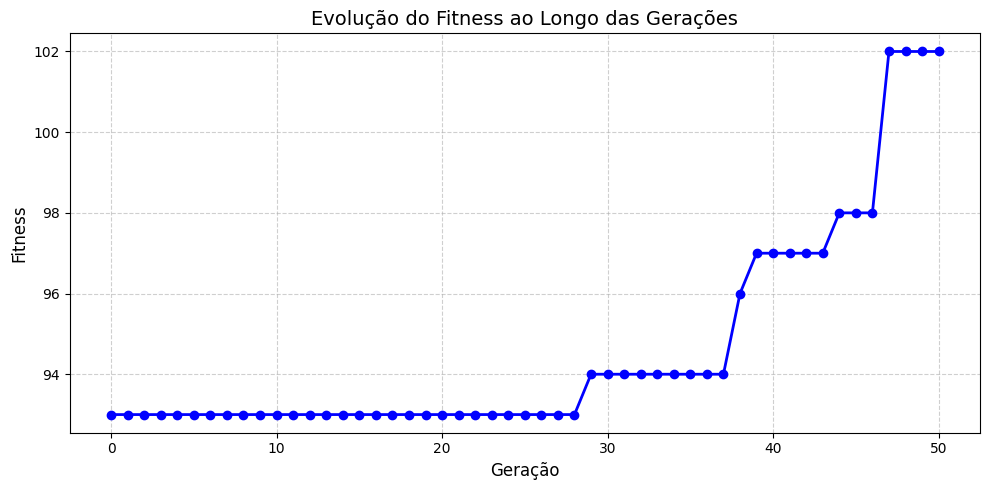

In [12]:
fitness_values = sorted([i[1] for i in top], reverse=False)

plt.figure(figsize=(10, 5))
plt.plot(fitness_values, marker="o", linestyle="-", color="blue", linewidth=2, markersize=6)
plt.xlabel("Geração", fontsize=12)
plt.ylabel("Fitness", fontsize=12)
plt.title("Evolução do Fitness ao Longo das Gerações", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Visualização dos Resultados

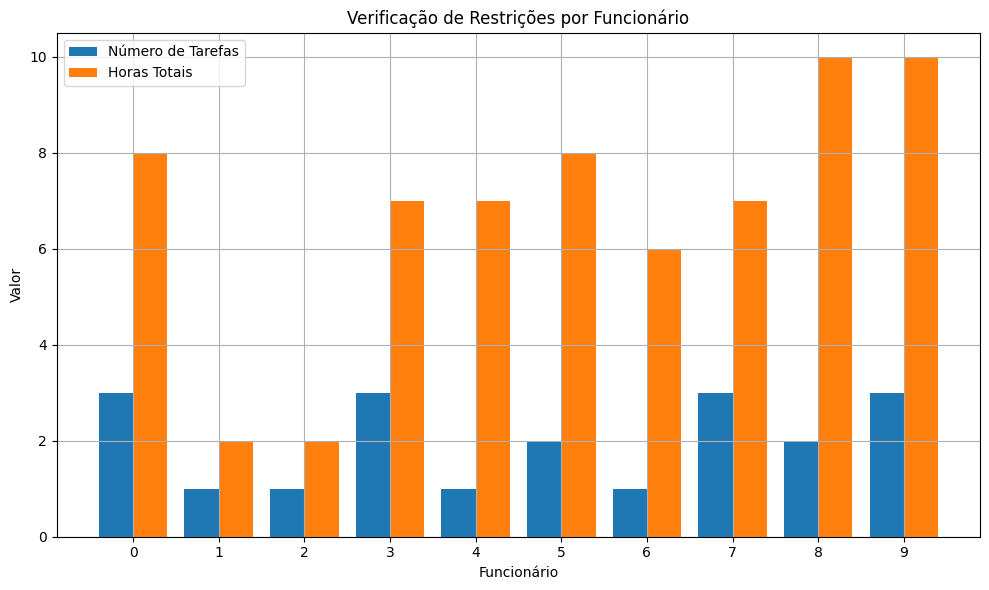

In [9]:
from collections import defaultdict

tarefas_por_funcionario = defaultdict(int)
horas_por_funcionario = defaultdict(int)

# Preencher dados
for tarefa_idx, funcionario in enumerate(top[0][0]):
    duracao = duration_df.iloc[tarefa_idx]["Duracao_horas"]
    tarefas_por_funcionario[funcionario] += 1
    horas_por_funcionario[funcionario] += duracao

# Criar DataFrame de verificação
df_check = pd.DataFrame({
    "Funcionario": list(range(10)),
    "Num_Tarefas": [tarefas_por_funcionario[i] for i in range(10)],
    "Horas_Totais": [horas_por_funcionario[i] for i in range(10)]
})

# Plotar barras
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(df_check["Funcionario"], df_check["Num_Tarefas"], width=0.4, label="Número de Tarefas", align='center')
ax1.bar(df_check["Funcionario"] + 0.4, df_check["Horas_Totais"], width=0.4, label="Horas Totais", align='center')

ax1.set_xticks(df_check["Funcionario"] + 0.2)
ax1.set_xticklabels(df_check["Funcionario"])
ax1.set_xlabel("Funcionário")
ax1.set_ylabel("Valor")
ax1.grid()
ax1.set_title("Verificação de Restrições por Funcionário")
ax1.legend()

plt.tight_layout()
plt.show()
